In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  DATASET-3: Runge phenomenon



This dataset is available on the github url:  **https://github.com/supportvectors/ml-100**. 

## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in data science notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`

Many of the pertinent discussions are present therein; for brevity, we will not repeat those explanations, and will omit some of the steps, so that we can focus on the main topic on this notebook.

## Lab Goals

* We will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

At the end of the lab, we should have an understanding of the following:

1. The limitations of polynomial regression
2. Runge phenomenon

## Load and explore the data


Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-3.csv

Let us, therefore, load it, and perform some basic explorations.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-3.csv'
data = pd.read_csv(source)

In [3]:
data.head()

,x,y
0,5.130559,0.032875
1,9.158972,0.006139
2,0.070907,0.159699
3,-5.424548,0.010495
4,-2.526089,0.025251


#### Descriptive statistics


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,99.0,0.754140,5.735378,-9.983914,-4.295744,1.904103,5.175448,9.986022
y,99.0,0.054447,0.075199,-0.013830,0.001989,0.011805,0.101018,0.227936


#### Missing Values Analysis


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

## Data Visualization

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **Can you guess what the correlation is between the variables?** Try finding the answer programmatically, and see if it agrees with your guess. What does it say about the relationship between $x$ and $y$?

Is this data reminiscent of some ubiquitous curve you encounter?

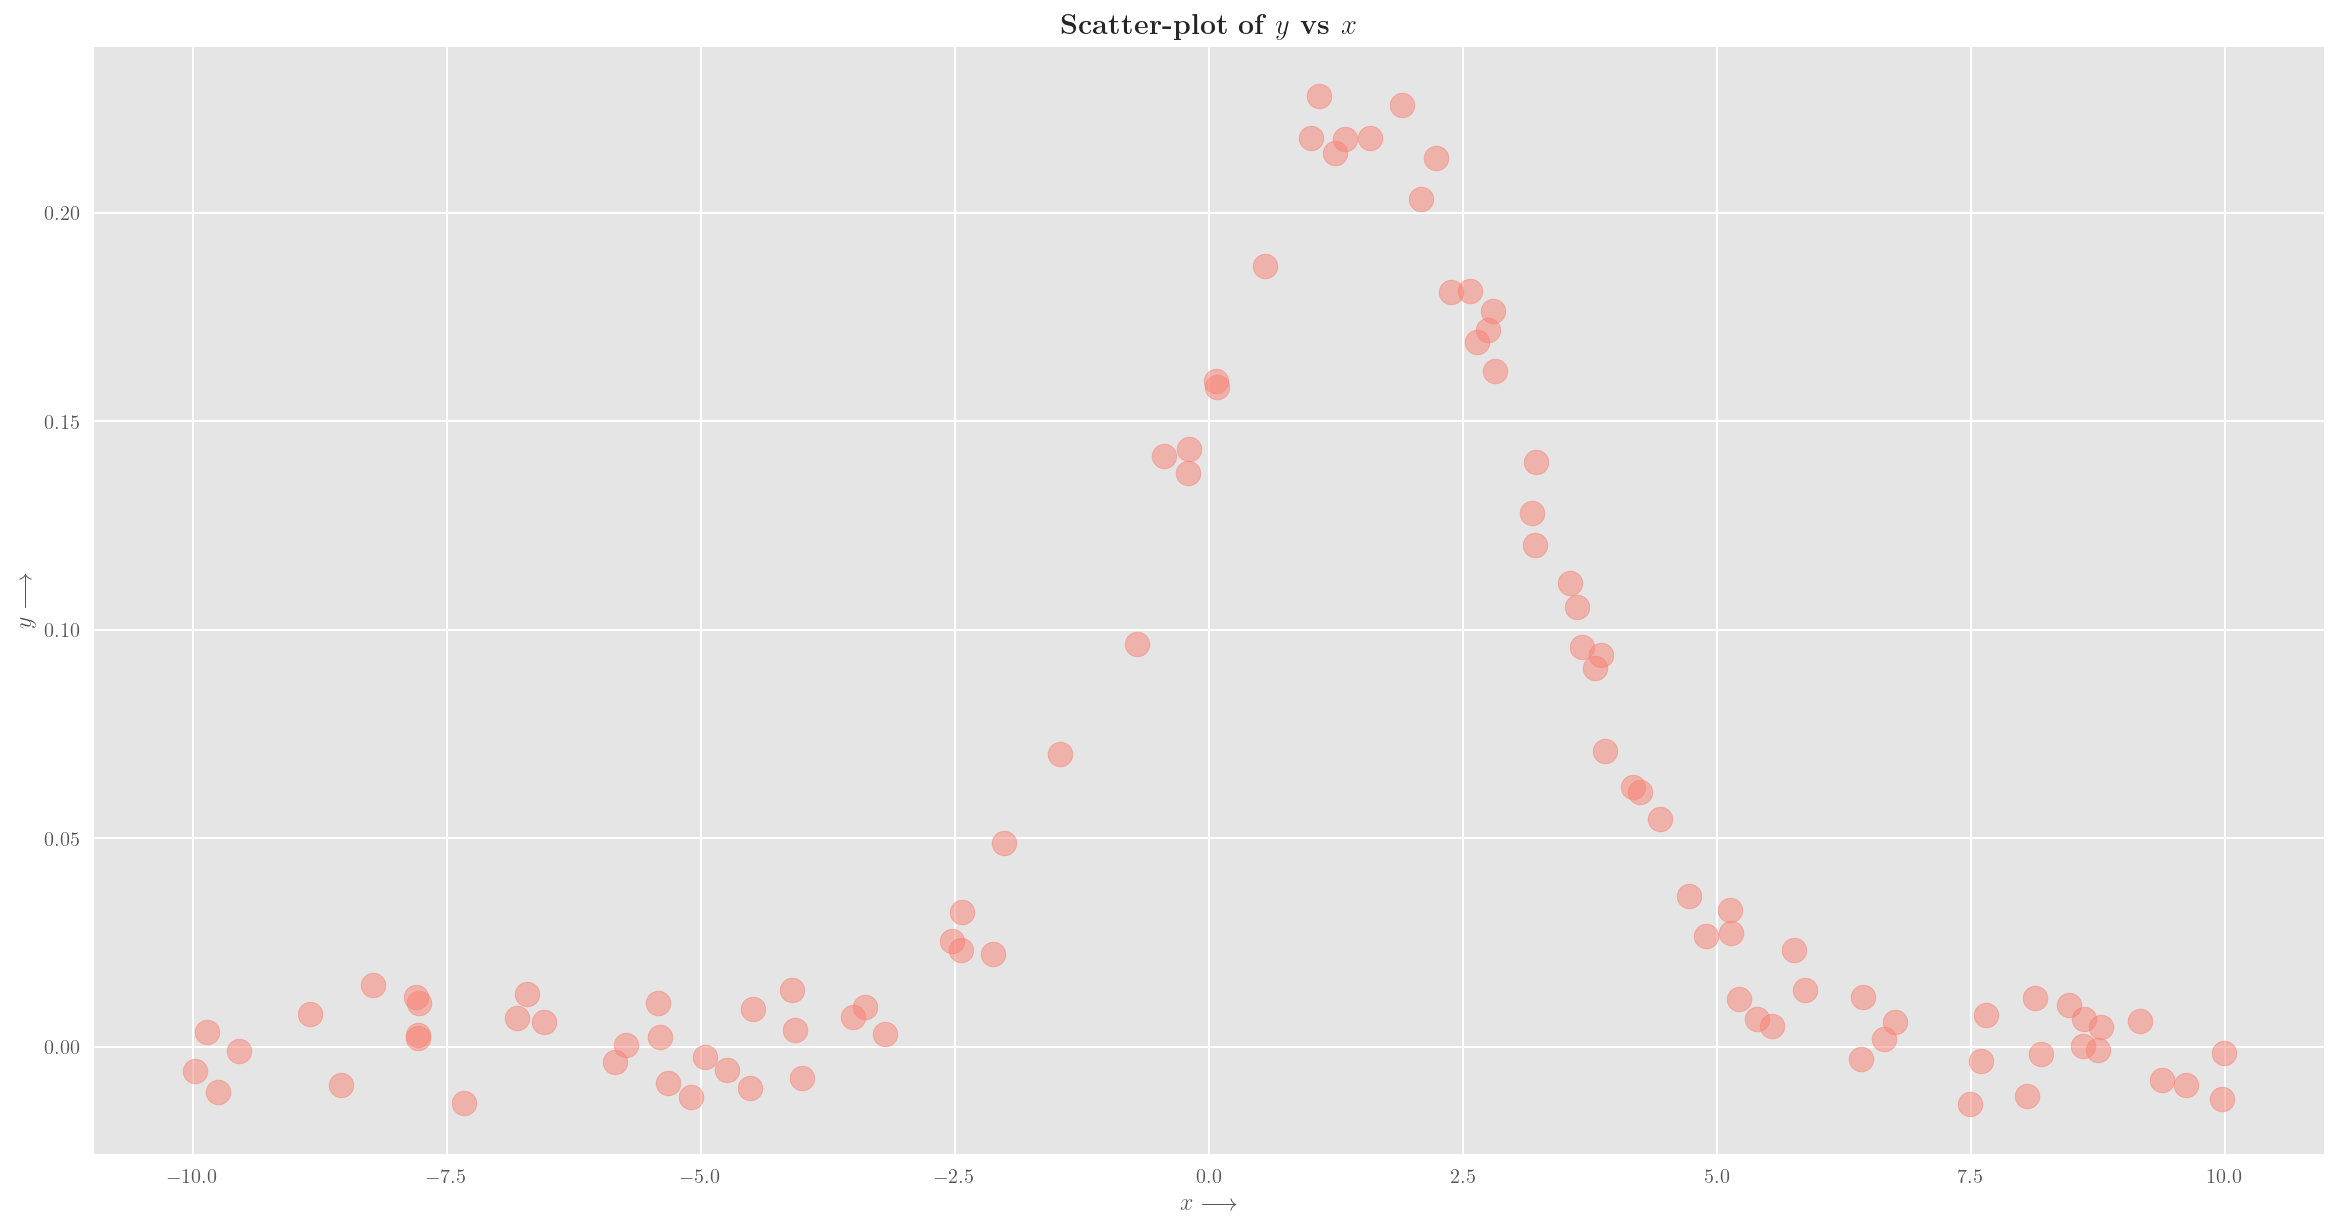

In [6]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance. 

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [7]:
X, y = data[['x']], data['y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [9]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [10]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 0.048949776703584615, Slope: [0.00294115]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [11]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.01
Coefficient of Determination (R^2):-0.051842968662701994


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

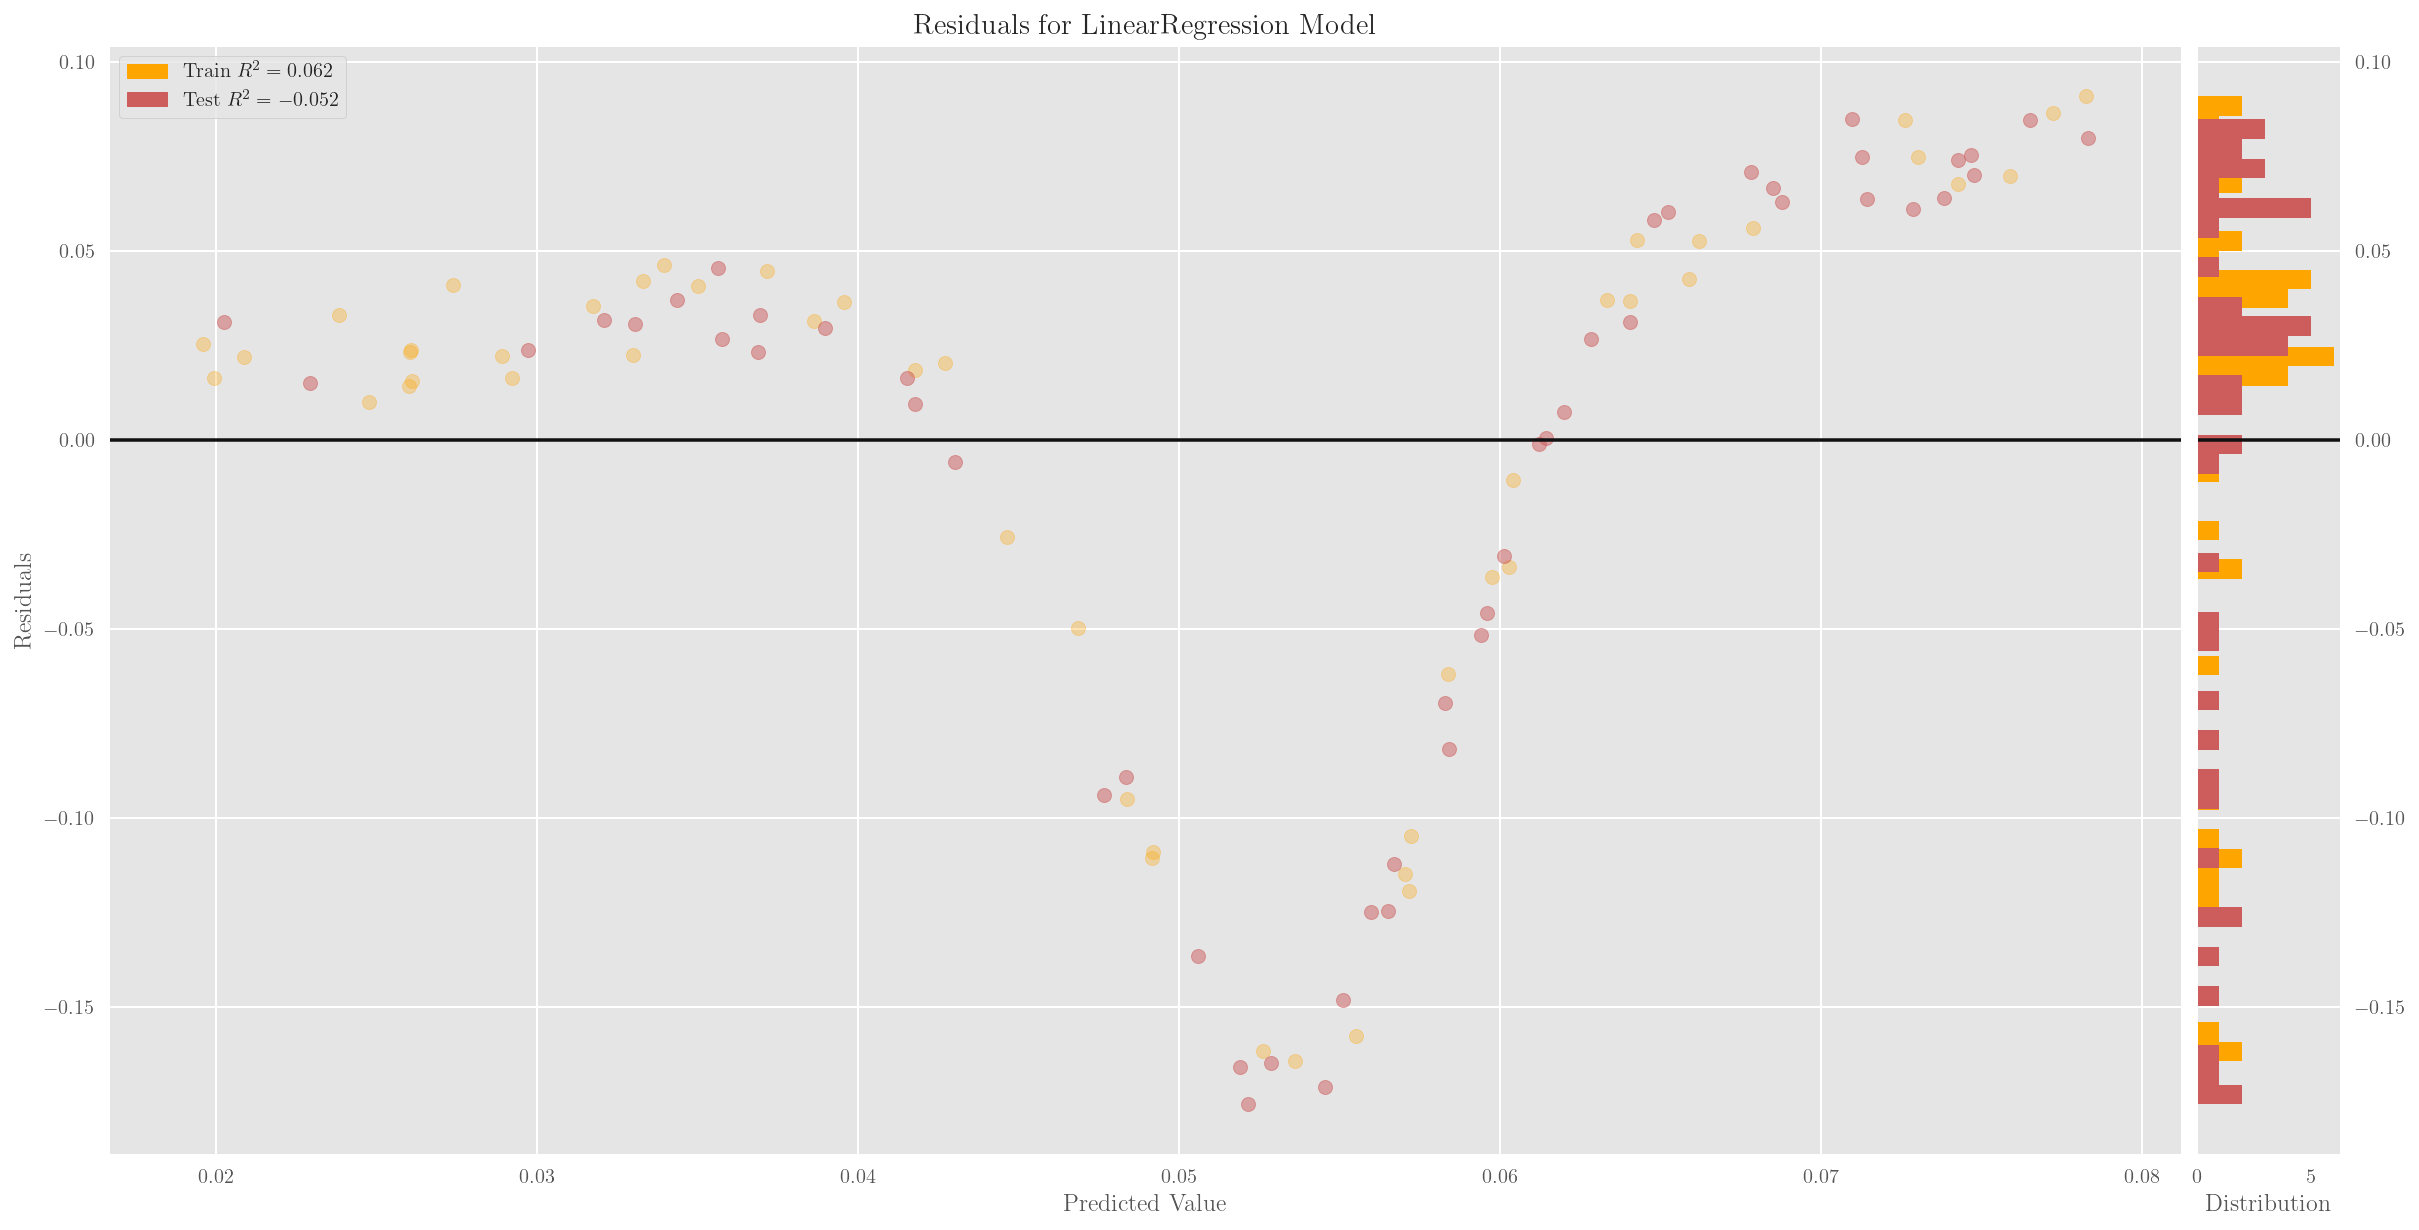

In [12]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [13]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

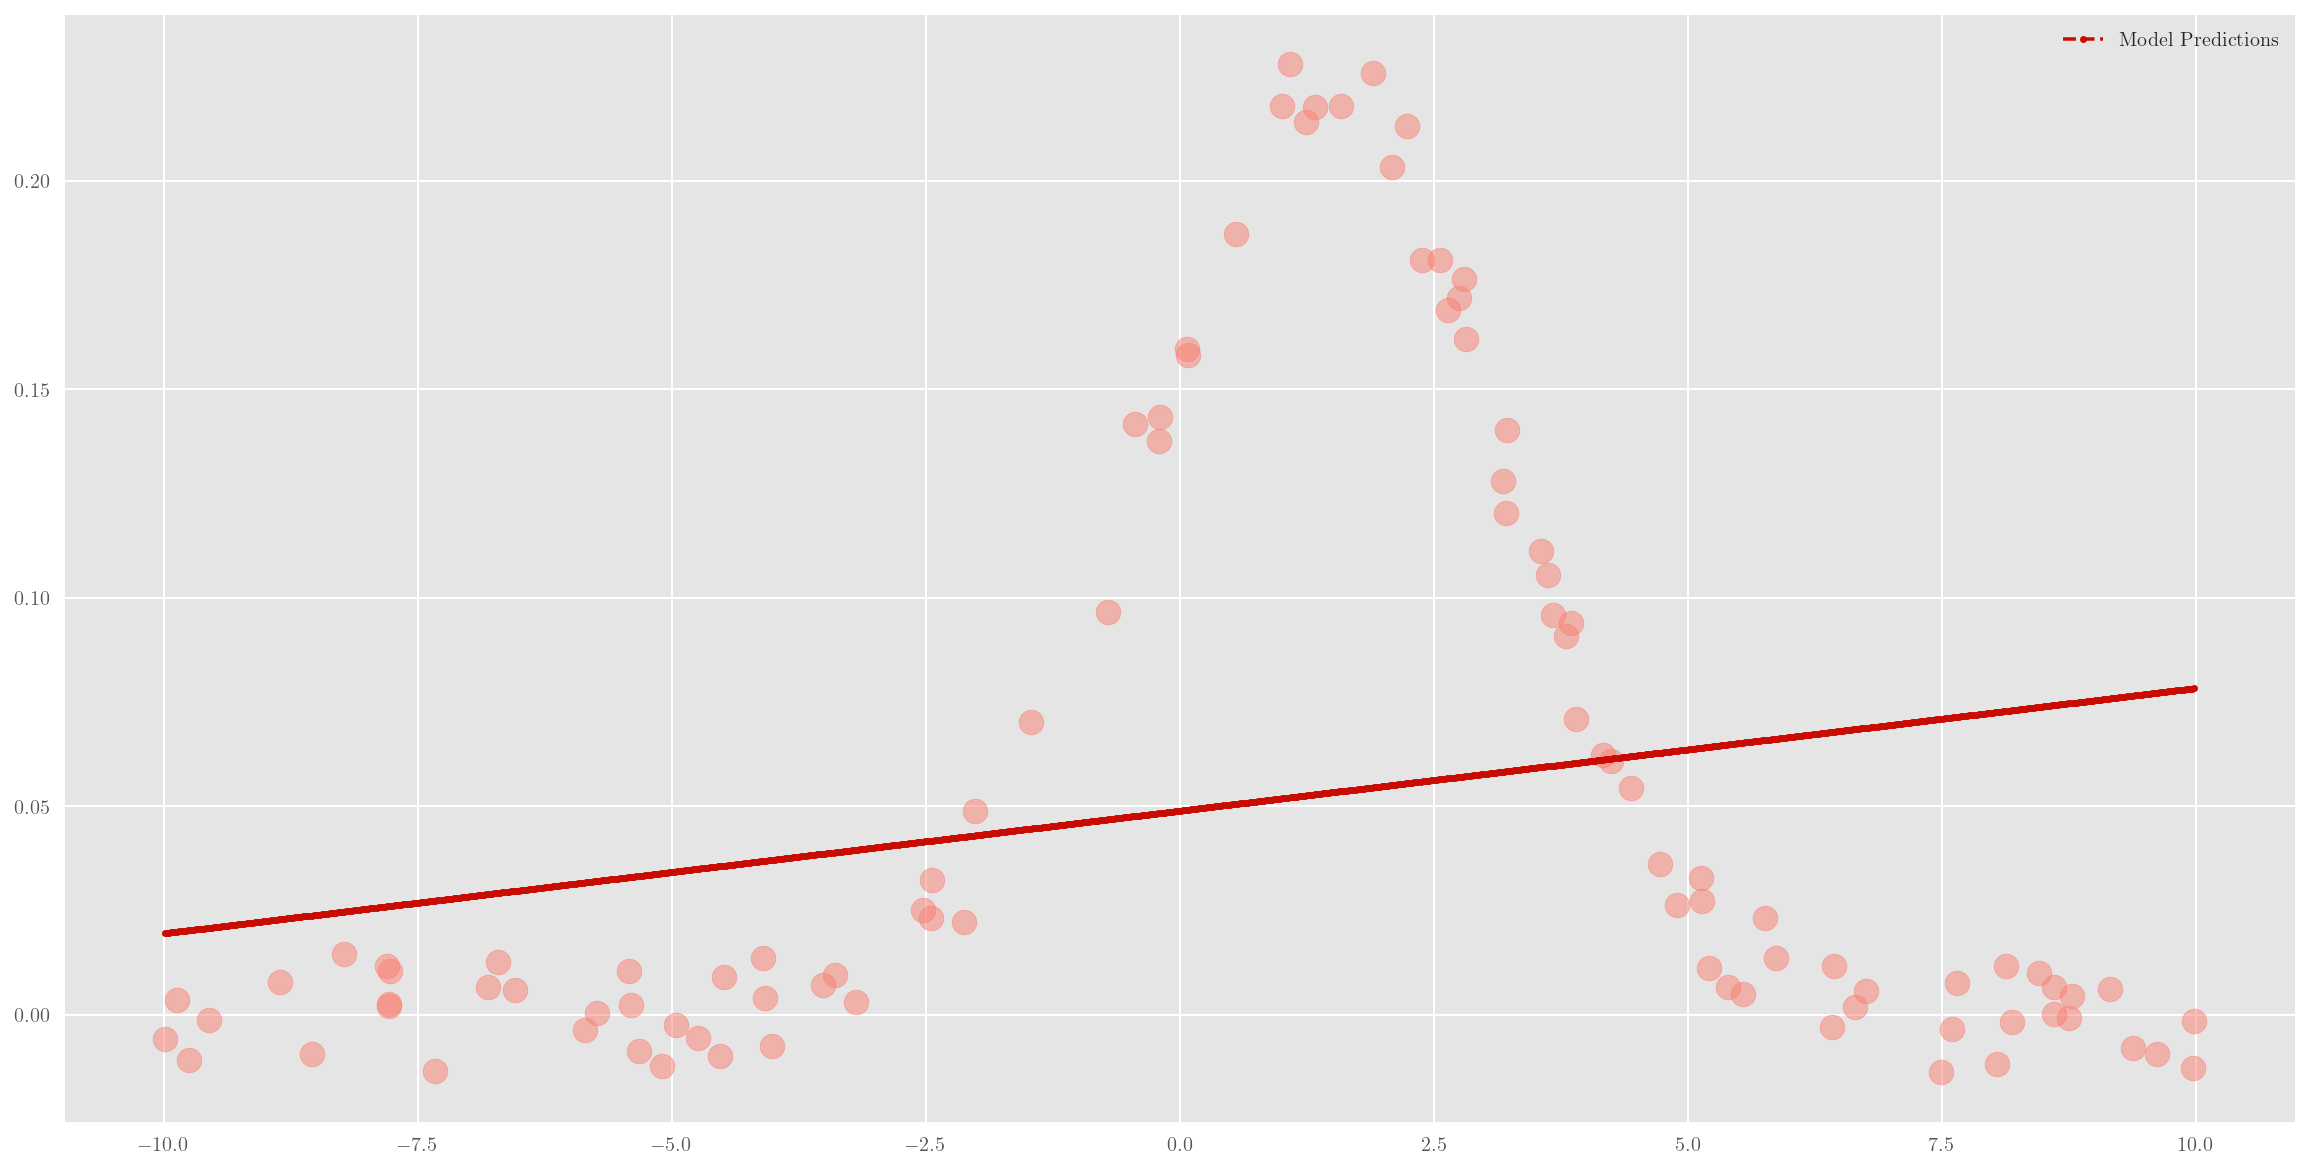

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This linear model has, as one would have expected by now, failed terribly!

# Polynomial Regression

The lesson from the prior notebooks is that adding polynomial features to the dataset, and then performing the regression can be an effective tool. Will this work here? Let's find out.

In the interest of brevity, we have merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [15]:
degree     = 7
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  4.16727041e-02 -8.80176385e-03 -2.27792074e-03
  1.51733311e-04  3.72412831e-05 -8.04777326e-07 -1.88232104e-07]
Mean squared error: 0.00
Coefficient of Determination (R^2):0.9390509448273192


When we experiment with polynomials of different degrees, we find that it takes polynomials of atleast the seventh degree to get a good value for the coefficient of determination. 

We may be inclined to congratulate ourselves in the belief that we have finally trained an effective regression model for this data. It is time to confirm our belief by proceeding now with the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

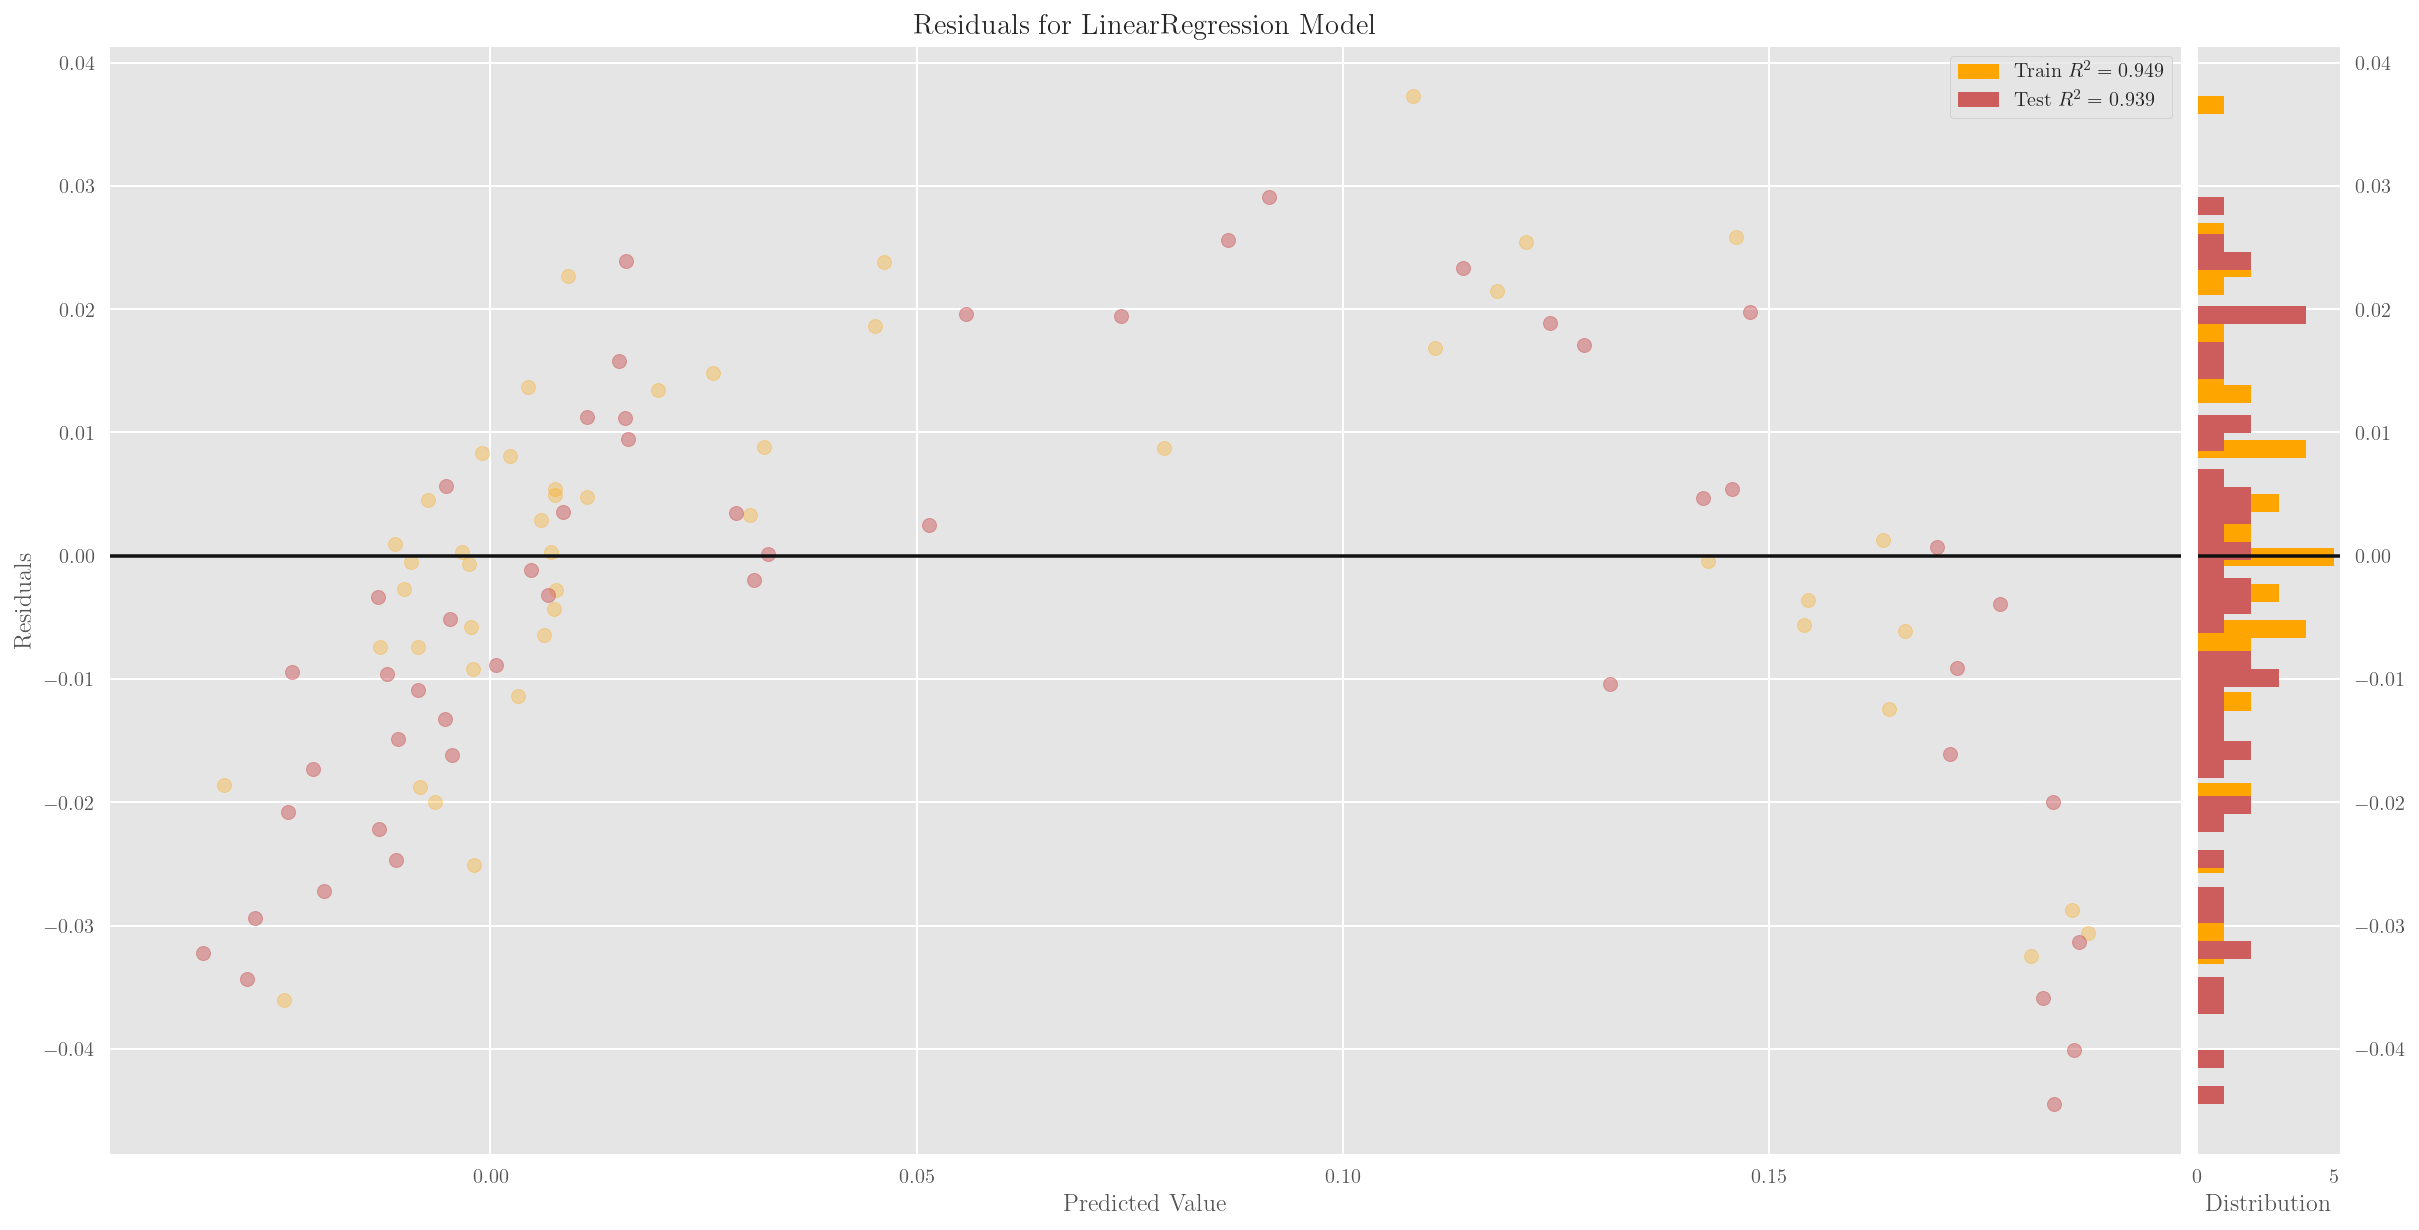

In [16]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

This is rather a disappointment: the plot has a clearly discernible pattern. Thus we may not have found so good a model, after all. What possibly could be the problem? Let's explore.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [17]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

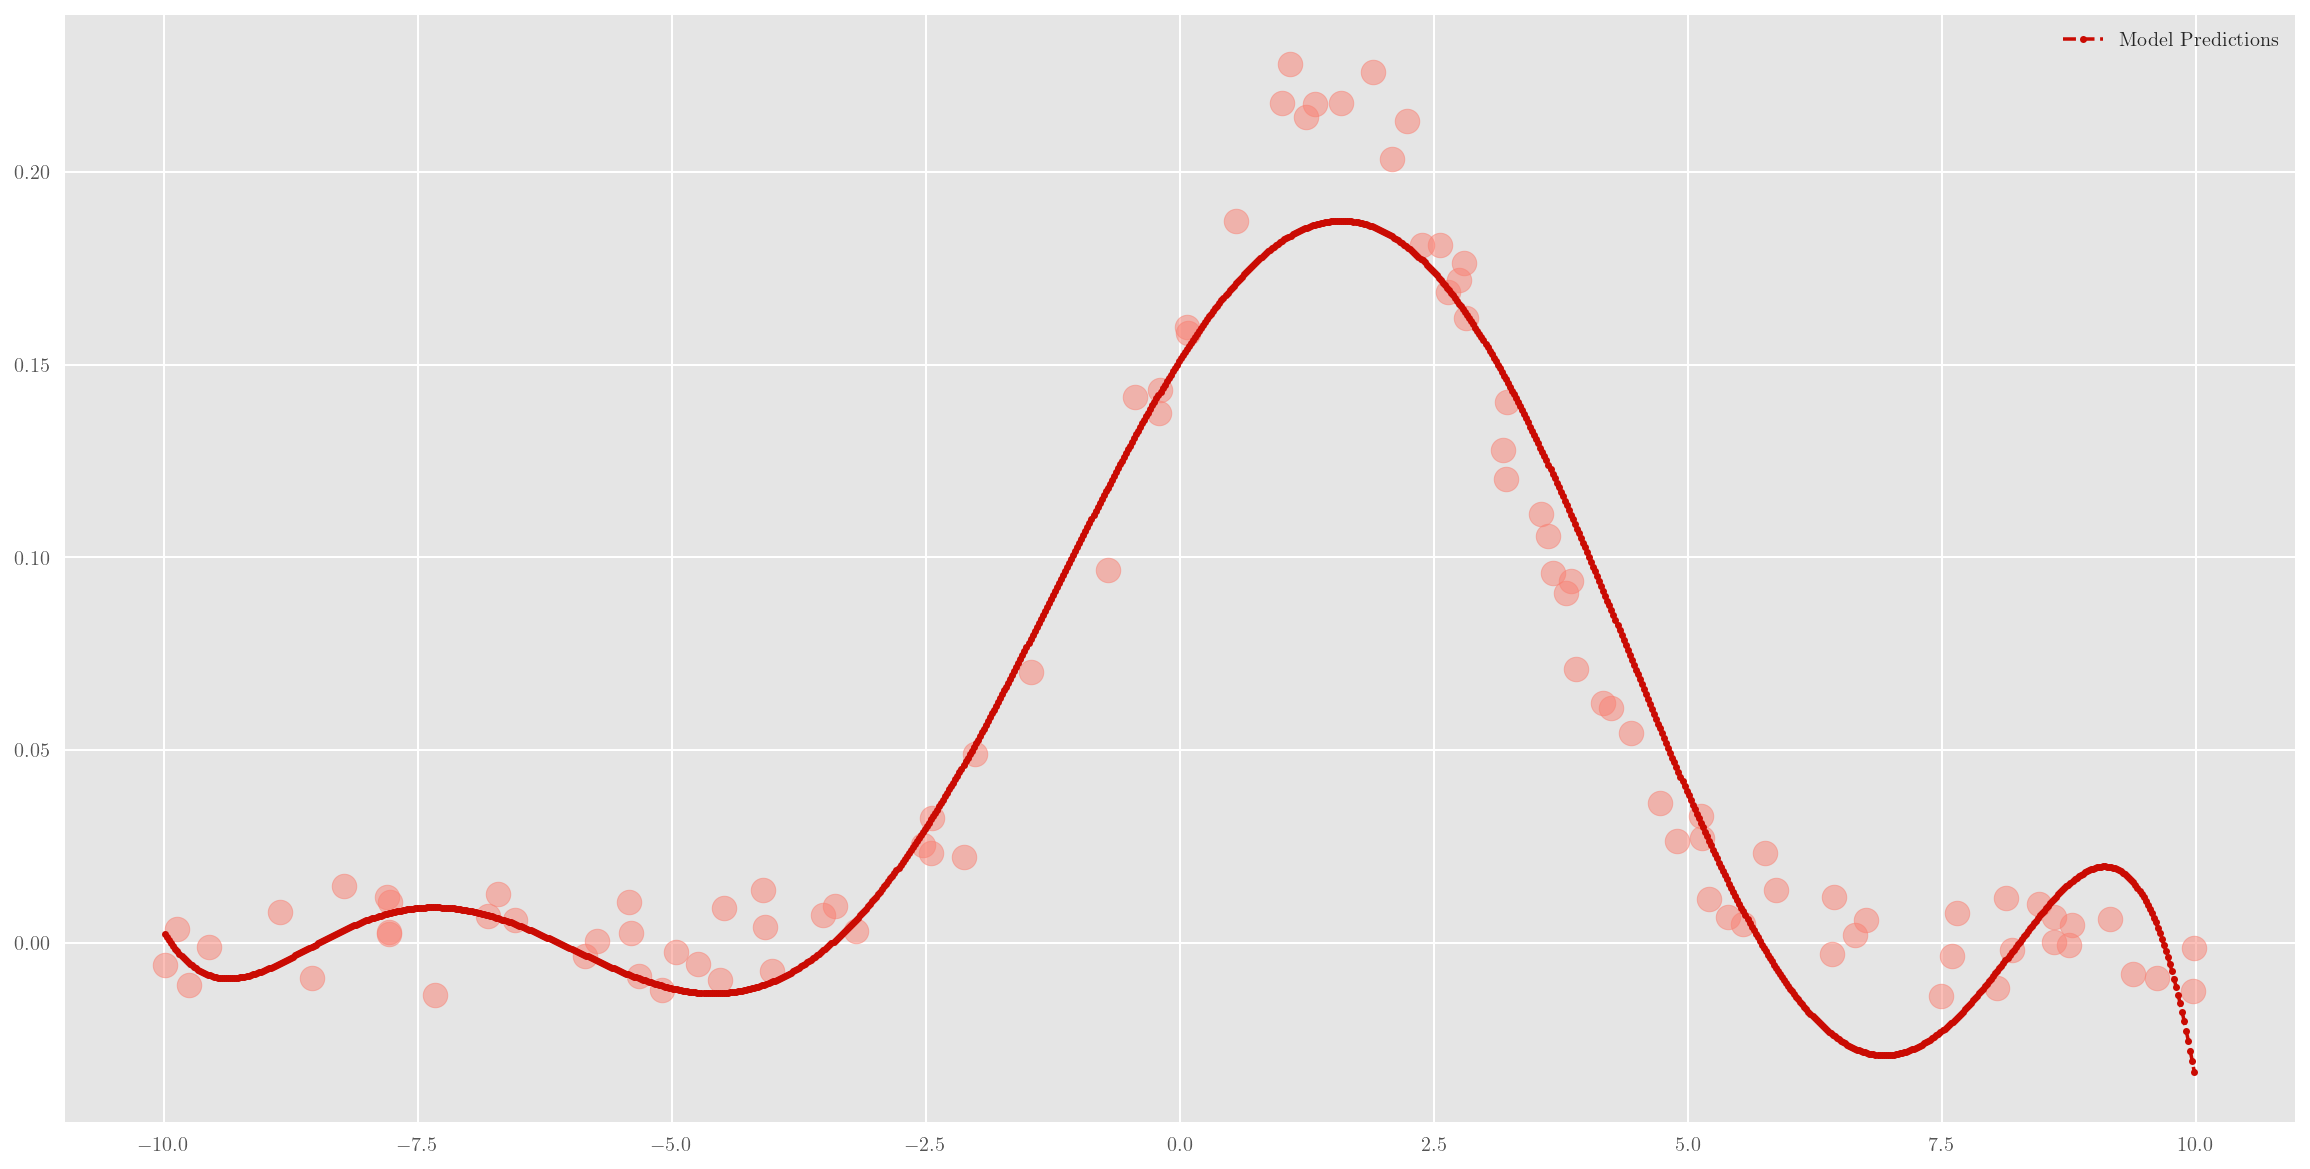

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

## Runge Phenomenon

Observe how the prediction curve seems to be oscillating towards the left and right peripheries. This phenomenon is intrinsic to polynomial regression with high degrees of the polynomial, when dealing with regions of data sparcity, as near the ends. Runge discovered it over a hundred years ago, in 1901, as a fundamental limitation of polynomial regression.

Learn more about it at: https://en.wikipedia.org/wiki/Runge%27s_phenomenon

## Historical Notes

Legendre wrote the first definitive exposition of the least-squares method in 1805. Later,
in a paper of Gauss on celestial bodies, he used the technique, but claimed he had
discovered it years ago atleast since 1795. One story goes that he discovered it as a ten
year old, while solving a chemistry problem for his friend. In the new world, an American, 
Robert Adrain too came to discover this, around 1808, independently. And thus started
one of the most famous prior debates in mathematical history, i.e. debate of who did it
first!

Most people now agree that each of the mathematicians, Gauss, Legendre and Adrain had
independently come upon it. Gauss then extended it quite a bit, tying it to probability
theory. By 1822, Gauss has proven the optimality of the least-squares approach to
regression analysis, as an estimator, in what is now called the Gauss-Markov Theorem.
Gergonne wrote the first paper on polynomial regression.

The term Regression itself was coined by Francis Galton in the nineteen
century, when he observed that children of very short parents tend to be
taller than their parents. Likewise children of very tall parents tend to be
shorter than their parents. In other words, in the successive generations, the
outlier-progenies regress towards the mean. This work was further developed
and generalized to quite an extent by his student Pearson and also by Udny
Yule.



# Conclusion

Polynomial regression is a powerful tool in the data science arsenal; however, it has it limits of applicability. Runge phenomenon points to one such limitation. In later notebooks, we will discover that there are even strong limitations to this approach being effectively applied to a certain areas. That is the context of a separate exploration soon!
